In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2456 files belonging to 6 classes.


In [5]:
class_names = dataset.class_names
class_names

['banayan', 'oak', 'palm', 'pine', 'sandalwood', 'spruce']

In [6]:
len(dataset)

77

In [7]:
train_ds = dataset.take(16)

In [8]:
test_ds = dataset.skip(16)

In [9]:
val_ds = test_ds.take(2)
test_ds = test_ds.skip(2)

In [10]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [11]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0/255)
])

In [12]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2)
])

In [13]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size =(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(6,activation='softmax')
])
model.build(input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,3))

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [14]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 6)                     │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,942 (718.52 KB)

 Trainable params: 183,942 (718.52 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [37]:
history = model.fit(
    train_ds,
    epochs=11,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/11
16/16 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.1407 - loss: 1.7978 - val_accuracy: 0.1562 - val_loss: 1.7850
Epoch 2/11
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.1841 - loss: 1.7871 - val_accuracy: 0.1250 - val_loss: 1.7707
Epoch 3/11
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.1782 - loss: 1.7703 - val_accuracy: 0.2344 - val_loss: 1.6851
Epoch 4/11
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.2287 - loss: 1.7028 - val_accuracy: 0.2812 - val_loss: 1.6724
Epoch 5/11
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.2639 - loss: 1.6925 - val_accuracy: 0.2812 - val_loss: 1.5845
Epoch 6/11
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.3414 - loss: 1.6411 - val_accuracy: 0.2812 - val_loss: 1.7671
Epoch 7/11
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.3391 - loss: 1.6231 - val_accuracy: 0.4531 - val_loss: 1.5254
Epoch 8/11
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.3084 - loss: 1.5582 - val_accuracy: 0.4062 - val_loss:

In [38]:
scores = model.evaluate(test_ds)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - accuracy: 0.4361 - loss: 1.2165


In [39]:
scores

[1.1385109424591064, 0.46666666865348816]

In [42]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

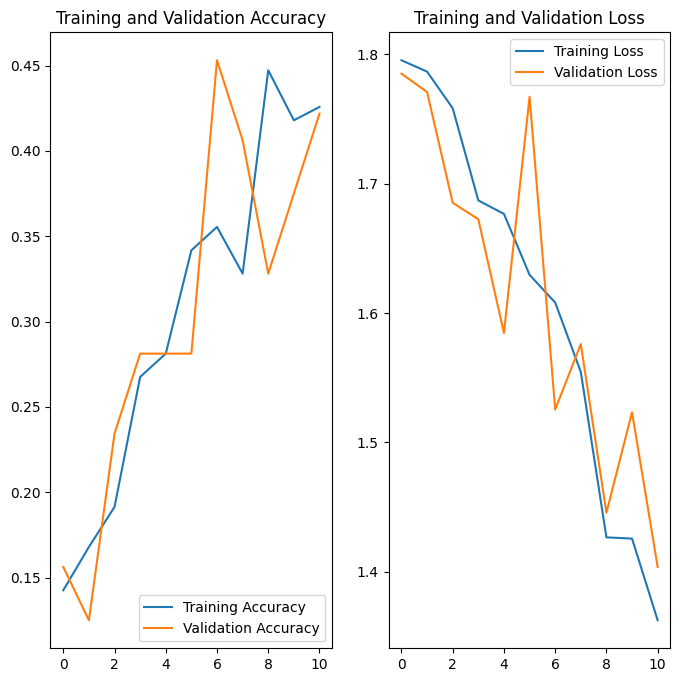

In [50]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(11),acc,label="Training Accuracy")
plt.plot(range(11),val_acc,label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(11),loss,label="Training Loss")
plt.plot(range(11),val_loss,label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

first image to predict
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
[0.16195802 0.16363773 0.17150131 0.16673523 0.16085795 0.17530966]
first image's actual label:  oak
first image's model prediction:  spruce


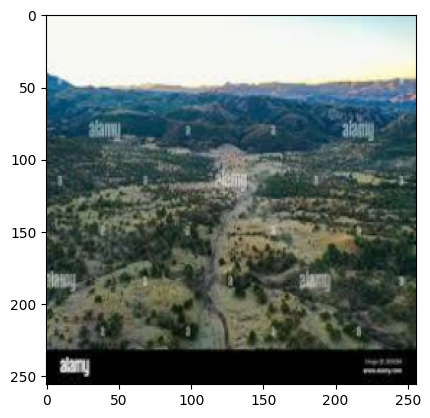

In [19]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)

    batch_prediction = model.predict(images_batch)
    print(batch_prediction[0])
    print("first image's actual label: ",class_names[first_label])
    print("first image's model prediction: ",class_names[np.argmax(batch_prediction[0])])
    # print("first image's model prediction: ",class_names[first_label])

In [20]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)

    predictions = model.predict(img_array)
    print(predictions)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
[[0.16623239 0.16315721 0.17163672 0.16280594 0.16432318 0.1718445 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
[[0.16649655 0.16526288 0.16957052 0.16246387 0.16558914 0.17061704]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[[0.16638184 0.16503562 0.17102244 0.16236879 0.1645392  0.17065208]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
[[0.16649613 0.16510525 0.17023893 0.1631585  0.16522783 0.1697734 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[0.16615298 0.16405016 0.17108743 0.1604474  0.16517887 0.17308322]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
[[0.16632468 0.16506158 0.1698034  0.1635517  0.16551642 0.16974229]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
[[0.16538732 0.16390225 0.17123882 0.16242221 0.16536437 0.17168507]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
[[0.16633146 0.16400547 0.17129166 0.1619377  0.16492133 0.17151237]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
[[0.16607729 0.16494764 0.16945861 0.16503976 0.16557516 0.1689015 ]]


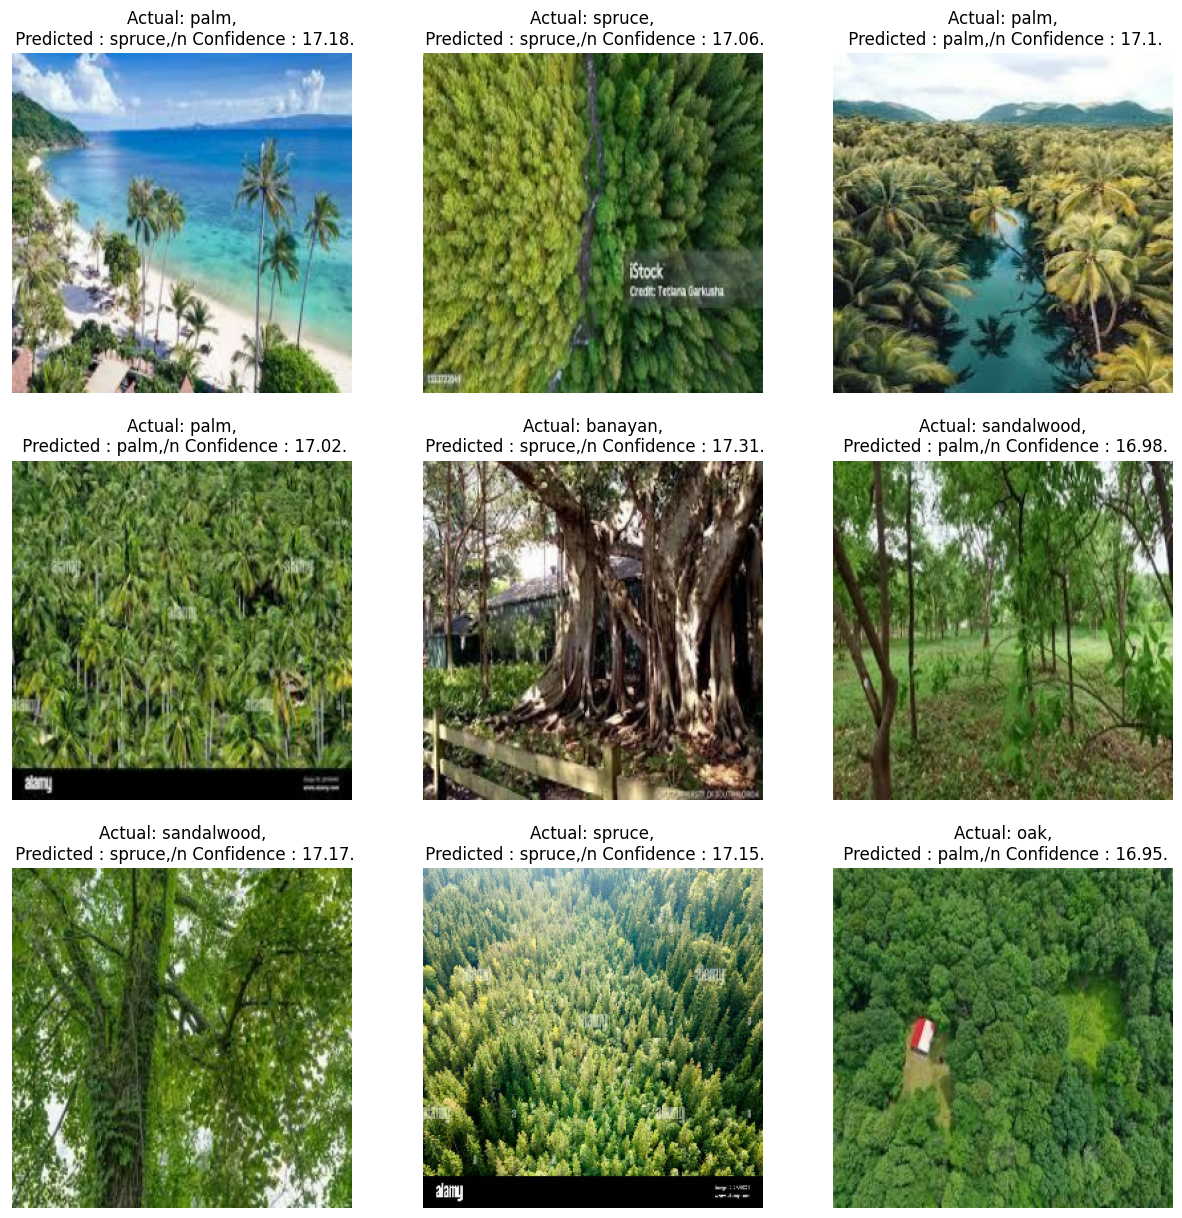

In [26]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted : {predicted_class},/n Confidence : {confidence}.")
        
        plt.axis("off")

In [ ]:
model_version = 1
model.save(f"./models/2.h5")

TypeError: cannot pickle 'module' object